<a href="https://colab.research.google.com/github/tattvashashvatis/DSAirlinePyProj/blob/master/AirLine_Data_UpxProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1 align="center"> UpX Academy DataScience Project </H1>
<H2 align="center"> Airline Data analysis </H2>
<H3 align="right"> Shrikant Sundaram </H3>


### Local Path

In [0]:
your_local_path = 'D:/shrikant/Application'

## Import functions

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid") #theme selection option!
sns.set(color_codes=True)

import pandas as pd
import numpy as np
#import pickle
import datetime as dt
from scipy import stats

import warnings # to ignore warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

from sklearn.model_selection import train_test_split # splitting data
from sklearn.metrics.regression import mean_absolute_error # error metrics
from sklearn.metrics import mean_absolute_error

%matplotlib inline
#package -> module -> functions

# Read input file

In [0]:
#flight_df
flt_df = pd.read_csv('D:/PytProj/Proj_flight_data.csv')

# Nature of original data (count across series, other stats)

In [0]:
flt_df.head()

# Check data types of original series

In [0]:
flt_df.dtypes

# Clean data
## arr_time NaN values with mode of arr_time and dep_time

In [0]:
flt_df_NAfill = flt_df 
#  fill dep_time with mode value 
flt_df_NAfill['dep_time'].fillna(flt_df_NAfill['dep_time'].mode()[0], inplace=True)

# fill arr_time with mode value
flt_df_NAfill['arr_time'].fillna(flt_df_NAfill['arr_time'].mode()[0], inplace=True)

#sched= flt_df_NAfill['arr_time']-(flt_df_NAfill['sched_arr_time']).astype(float)
#sched

#function to calculate the arr_delay 
def NAfill_arrdel(cols):
    return cols.fillna(flt_df_NAfill['arr_time']-flt_df_NAfill['sched_arr_time']).astype(float)

#function to calculate the dep_delay 
def NAfill_depdel(col2):
    return col2.fillna(flt_df_NAfill['dep_time']-flt_df_NAfill['sched_dep_time']).astype(float)

#functions to calculate the air_time 
def NAfill_air(col1):
    return col1.fillna(flt_df_NAfill['arr_time']-flt_df_NAfill['dep_time'])


#calculate 9430 rows of arr_delay and air_time NaN values and reduce these NaN values
flt_df_NAfill.dep_delay=flt_df_NAfill['dep_delay'].transform(NAfill_depdel) #calc NaN values of air_time 
flt_df_NAfill.arr_delay=flt_df_NAfill['arr_delay'].transform(NAfill_arrdel) #calc NaN values of arr_delay
flt_df_NAfill.air_time=flt_df_NAfill['air_time'].transform(NAfill_air) #calc NaN values of air_time 

#print(flt_df_NAfill.loc[[471]])

# Define status code for flights as per arr_delay time
## to compare performance of origin airports for delays

In [0]:
flt_df_0Nan = flt_df_NAfill[pd.notnull(flt_df_NAfill['dep_time'])]
for ds in flt_df_0Nan:
    flt_df_0Nan.loc[flt_df_0Nan['arr_delay'] < 0, 'astatus'] = 1
    flt_df_0Nan.loc[(flt_df_0Nan['arr_delay'] == 0), 'astatus'] = 2
    flt_df_0Nan.loc[(flt_df_0Nan['arr_delay'] > 0) & (flt_df_0Nan['arr_delay'] <= 5), 'astatus'] = 3
    flt_df_0Nan.loc[(flt_df_0Nan['arr_delay'] > 5) & (flt_df_0Nan['arr_delay'] <= 20), 'astatus'] = 4
    flt_df_0Nan.loc[flt_df_0Nan['arr_delay'] > 20, 'astatus'] = 5 

for ds1 in flt_df_0Nan:
    flt_df_0Nan.loc[flt_df_0Nan['dep_delay'] < 0, 'dstatus'] = 11
    flt_df_0Nan.loc[(flt_df_0Nan['dep_delay'] == 0), 'dstatus'] = 12
    flt_df_0Nan.loc[(flt_df_0Nan['dep_delay'] > 0) & (flt_df_0Nan['dep_delay'] <= 5), 'dstatus'] = 13
    flt_df_0Nan.loc[(flt_df_0Nan['dep_delay'] > 5) & (flt_df_0Nan['dep_delay'] <= 20), 'dstatus'] = 14
    flt_df_0Nan.loc[flt_df_0Nan['dep_delay'] > 20, 'dstatus'] = 15 
    
#len(flt_df_0Nan[(flt_df_0Nan['arr_delay'] > 20)]['status']) 
len(flt_df_0Nan[(flt_df_0Nan['dep_delay'] == 0)]['dstatus'])

16514

# Departure delays analysis
## considering the delay dept status of more than 0min

In [0]:
dep_del_df = flt_df_0Nan[flt_df_0Nan['dstatus'] >= 13]
dep_del_df['dep_delay'].max()

In [0]:
arr_del_df = flt_df_0Nan[flt_df_0Nan['astatus'] >= 3]
arr_del_df['arr_delay'].min()

# Air speed per flight

In [0]:
#flt_df_0Nan.drop('air_speed', inplace=True)
for ds1 in flt_df_0Nan:
    flt_df_0Nan['air_speed'] = np.divide(flt_df_0Nan['distance'],flt_df_0Nan['air_time'])

#write file to csv for ref. in Excel
flt_df_0Nan.to_csv("Flt_upd_data.csv")

# Originwise delayed departure 

In [0]:
#aggregate all records of flights departed with delay
delay_depart_df = flt_df[flt_df['dep_delay'] > 0]

#get subtotal of delayed flights grouped originwise
delay_depart_dfCount = delay_depart_df['dep_delay'].groupby(delay_depart_df['origin']).count()

#get total flights departed grouped originwise
TotFltD = flt_df['dep_delay'].groupby(flt_df['origin']).count()

#fraction of flights which departed delayed - delayed deivided by total
dep_del = np.divide(delay_depart_dfCount, TotFltD)
dep_del_perc = dep_del/100
dep_del_perc

origin
EWR    0.004363
JFK    0.003777
LGA    0.003219
Name: dep_delay, dtype: float64

# Dest wise delayed arrival

In [0]:
#aggregate all records of flights departed with delay
delay_arr_df = flt_df[flt_df['arr_delay'] > 0]

#get subtotal of delayed flights grouped originwise
delay_arr_dfcount= delay_arr_df['arr_delay'].groupby(delay_arr_df['dest']).count()

#get total flights departed grouped originwise
TotFltD = flt_df['arr_delay'].groupby(flt_df['dest']).count()

print(TotFltD.shape, delay_arr_dfcount.shape)

#fraction of flights which departed delayed - delayed deivided by total
#arr_del = np.divide(delay_arr_dfcount, TotFltD)
#arr_del_perc = arr_del/100
#arr_del_perc

(105,) (104,)


# Originwise timely departure

In [0]:
dep_ot_df = flt_df[flt_df['dep_delay'] <= 0]

dep_ot_DfCount = dep_ot_df['dep_delay'].groupby(dep_ot_df['origin']).count()
TotFltA = flt_df['dep_delay'].groupby(flt_df['origin']).count()

ot_dep = np.divide(dep_ot_DfCount, TotFltA)   
ot_dep_perc = ot_dep/100
ot_dep_perc

origin
EWR    0.005637
JFK    0.006223
LGA    0.006781
Name: dep_delay, dtype: float64

# Histogram frequency on dep time.

Skewness for dep_time indicates tail is towards left of the mean: 0.29189113175090864
Kurtosis for dep_time indicates the data has less outlier distribution: -1.1296157466500427


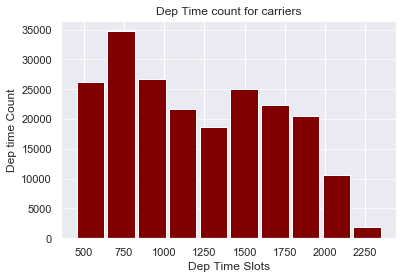

In [0]:
#skewness and kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew

#delay_depart_df.dep_time.plot.hist(grid=True,rwidth=0.9, color='maroon')#color='#607c8e')
dep_ot_df.dep_time.plot.hist(grid=True,rwidth=0.9, color='maroon')#color='#607c8e')
plt.title('Dep Time count for carriers')
plt.xlabel('Dep Time Slots')
plt.ylabel('Dep time Count')
plt.grid(axis='y', alpha=0.75)

#print("Skewness for dep_time indicates tail is towards left of the mean: {}".format (skew(delay_depart_df.dep_time)))
#print("Kurtosis for dep_time indicates the data has less outlier distribution: {}".format (kurtosis(delay_depart_df.dep_time)))

print("Skewness for dep_time indicates tail is towards right of the mean: {}".format (skew(dep_ot_df.dep_time)))
print("Kurtosis for dep_time indicates the data has less outlier distribution: {}".format (kurtosis(dep_ot_df.dep_time)))


# Histogram frequency on arr time.

Skewness for arr_time indicates tail is towards left of the mean: 0.10062281237433615
Kurtosis for arr_time indicates the data has less outlier distribution: -0.7383860678395568


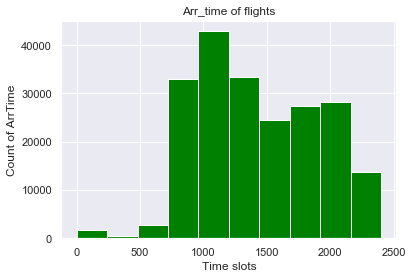

In [0]:
dep_ot_df.arr_time.hist(color='green');
plt.title("Arr_time of flights")
plt.ylabel('Count of ArrTime')
plt.xlabel('Time slots');


#flt_del = flt_df_0Nan[(flt_df_0Nan.dstatus >= 12) & (flt_df_0Nan.dstatus <= 15) ]

#print("Skewness: %f" % delay_depart_df['dep_time'].skew())
#print("Kurtosis: %f" % delay_depart_df['dep_time'].kurt())

print("Skewness for arr_time indicates tail is towards left of the mean: {}".format (skew(dep_ot_df.arr_time)))
print("Kurtosis for arr_time indicates the data has less outlier distribution: {}".format (kurtosis(dep_ot_df.arr_time)))

# Best Origin in terms of ontime departure 

# 1,2 Ontime vs Delayed Departure % Originwise

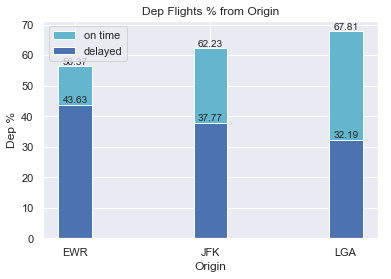

In [0]:
key_list = []
#for k in onSched_Depart.index:
for k in ot_dep.index:    # considering count of records for ontime flights
    key_list.append(str(k))
    
val = ot_dep.count()
ind = np.arange(val)  # the x locations for the OT group
width = 0.25      # the width of the bars

#val1 = dep_del.count()
#ind1 = np.arange(val1)  # the x locations for the delay group

#fig, ax = plt.subplots(figsize=(14,8))
fig, ax = plt.subplots()
rects2 = ax.bar(ind+width,ot_dep*100, width, color='c',label="on time")
rects1 = ax.bar(ind+width,dep_del*100, width, color='b',label="delayed")

ax.set_xticks(ind + width)
ax.set_ylabel('Dep %')
ax.set_xlabel('Origin')
ax.set_title('Dep Flights % from Origin')
ax.set_xticklabels(key_list)
#x.legend(rects2,'Arrival Delay')

def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,1*height,'%0.2f' % height,ha='center', va='bottom')
autolabel(rects2)
autolabel(rects1)
ax.legend()
plt.show()

# Delayed Departure % Originwise

#only for reference
#included along with OnTime origin flights

key_list = []
for i in dep_del.index:
    key_list.append(str(i))
    
#val = delay_Depart.count()
val= dep_del.count()
ind = np.arange(val)  # the x locations for the groups
width = 0.45      # the width of the bars
fig, ax = plt.subplots(figsize=(14,8))
#rects2 = ax.bar(ind+width,delay_Depart*100, width, color='c')
rects2 = ax.bar(ind+width, dep_del*100, width, color='c')

ax.set_xticks(ind + width )
ax.set_ylabel('Flights %')
ax.set_title('Delay Dep Flights % Originwise')

ax.set_xticklabels(key_list)

#x.legend(rects2,'Arrival Delay')
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%0.2f' % height,
                ha='center', va='bottom')
autolabel(rects2)
plt.show()

# 3,4. Departure delays analysis

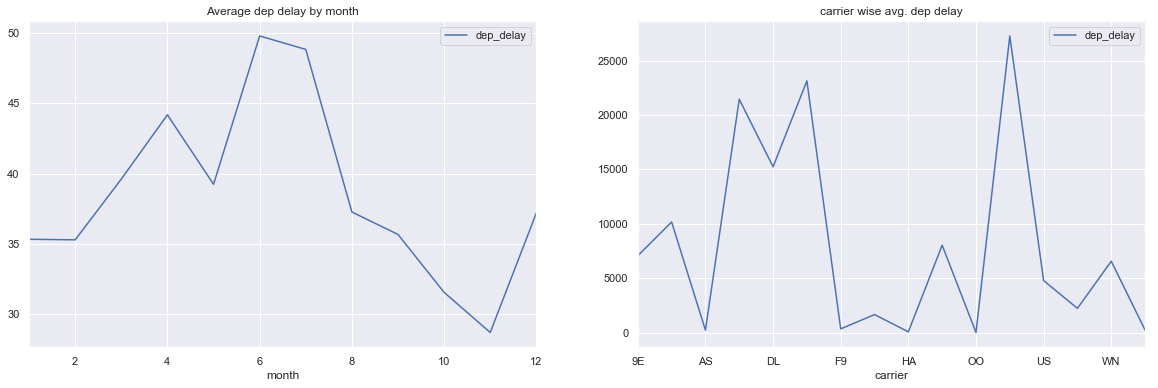

In [0]:
#indicates monthwise avg delay seen most during Jun/Jul least during Oct Nov
f,ax=plt.subplots(1,2,figsize=(20,6))
delay_depart_df[['dep_delay','month']].groupby(['month']).mean().plot(ax=ax[0])
ax[0].set_title('Average dep delay by month')

delay_depart_df[['dep_delay','carrier']].groupby(['carrier']).count().plot(ax=ax[1])
ax[1].set_title('carrier wise avg. dep delay')
plt.show()

# 5,6 Departure Ontime or before time analysis

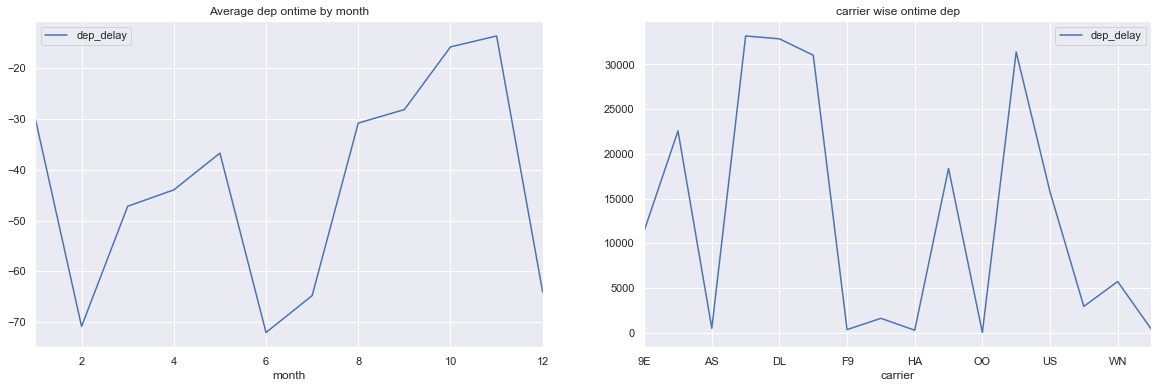

In [0]:
#indicates monthwise avg delay seen most during Jun/Jul least during Oct Nov
f,ax=plt.subplots(1,2,figsize=(20,6))
dep_ot_df[['dep_delay','month']].groupby(['month']).mean().plot(ax=ax[0])
ax[0].set_title('Average dep ontime by month')

dep_ot_df[['dep_delay','carrier']].groupby(['carrier']).count().plot(ax=ax[1])
ax[1].set_title('carrier wise ontime dep')
plt.show()

In [0]:
y=dep_del.index.values

## histogram identifying trend in dep_time from origin and arr_time at dest

### new DF for display manipulation

#only for reference
#flt_df_0Nan_disp = flt_df_0Nan #df for display manipulation
#flt_df_disp = flt_df_0Nan #df for display manipulation

## 7. heatmap correlation

Correlation map identifying high corr bet. arr_delay and dep_delay | distance and air_time


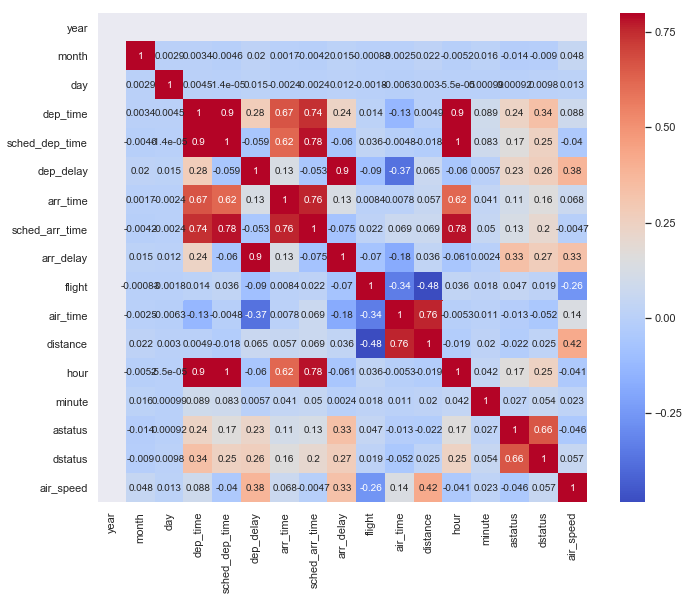

In [0]:
#Colormap coolmap is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
corrmat = flt_df_0Nan.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap = 'coolwarm', vmax=.8, annot=True, square=True);
print('Correlation map identifying high corr bet. arr_delay and dep_delay | distance and air_time')
plt.show()

# 8 Carrier wise speed plot

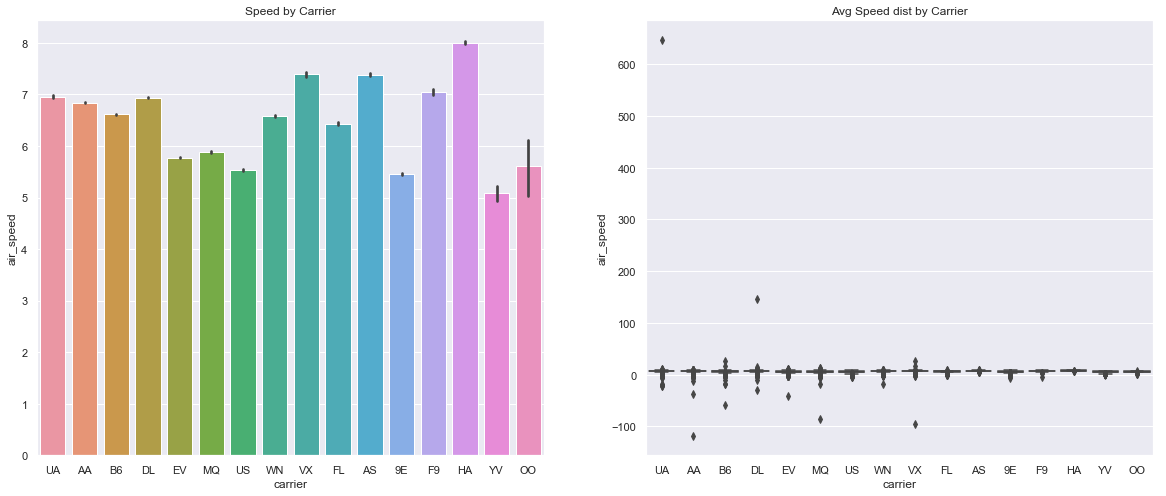

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('carrier','air_speed', data=flt_df_0Nan,ax=ax[0])
ax[0].set_title('Speed by Carrier')

sns.boxplot('carrier','air_speed', data=flt_df_0Nan,ax=ax[1])
ax[1].set_title('Avg Speed dist by Carrier')

plt.close(2)
plt.show()

# 9. Arrival delay % 

Status of flights timeliness delay %


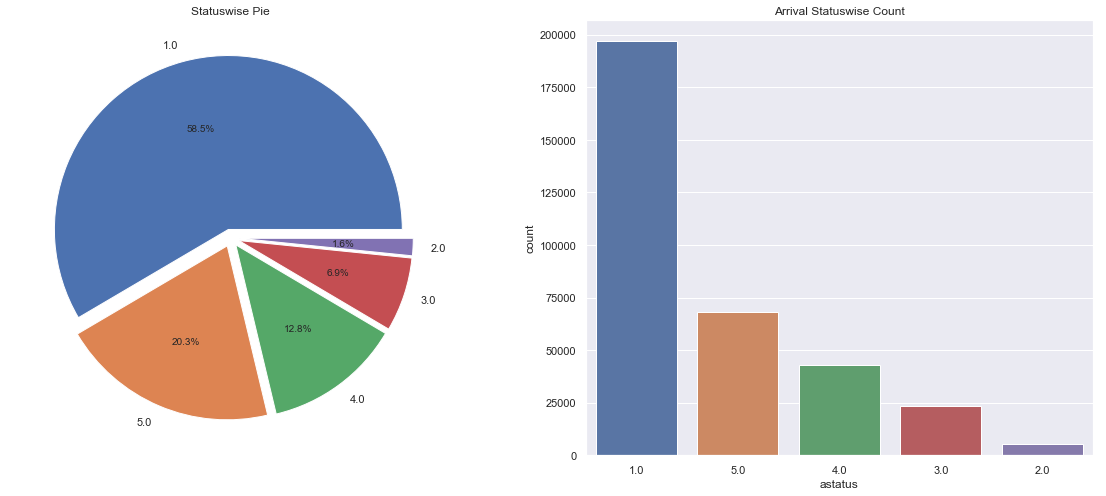

In [0]:
print("Status of flights timeliness delay %")
f,ax=plt.subplots(1,2,figsize=(20,8))
flt_df_0Nan['astatus'].value_counts()
flt_df_0Nan['astatus'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=False, )
ax[0].set_title('Statuswise Pie')
ax[0].set_ylabel('')
sns.countplot('astatus',order = flt_df_0Nan['astatus'].value_counts().index, data=flt_df_0Nan,ax=ax[1])
ax[1].set_title('Arrival Statuswise Count')
plt.show()

# 10 Carrier wise flight to destination 

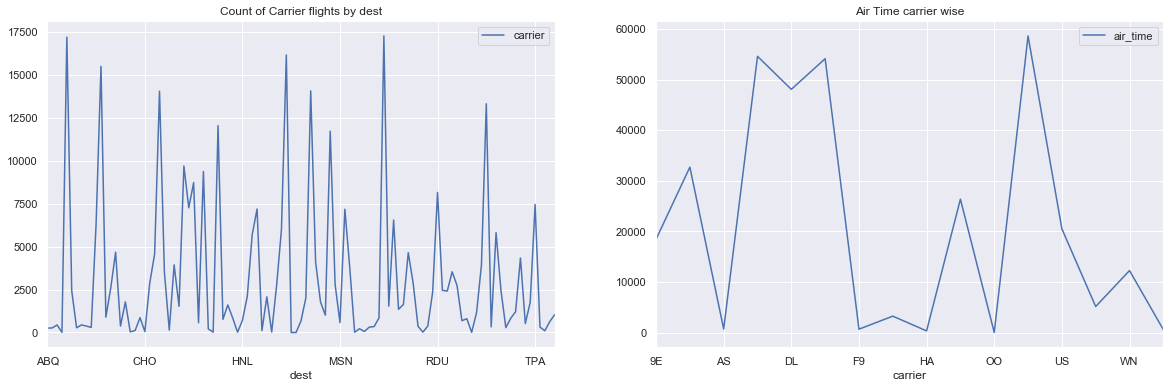

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,6))
flt_df[['dest','carrier']].groupby(['dest']).count().plot(ax=ax[0])
ax[0].set_title('Count of Carrier flights by dest')

# 11.carrier wise time taken for flights 
flt_df[['carrier','air_time']].groupby(['carrier']).count().plot(ax=ax[1])
ax[1].set_title('Air Time carrier wise')
plt.show()


#flt_del[['status','month']].groupby(['status']).count().plot(ax=ax[1])
#ax[1].set_title('monthwise status')
#plt.show()

#flt_del[['carrier','arr_delay']].groupby(['carrier']).count().plot(ax=ax[2])
#ax[2].set_title('Count of flights delayed by carrier over the period')
#plt.show()

# 12. Carrierwise departure delay scatter

Density of carriers delayed <0 min(1); 0 to 5min (2); 5 to 20 min (3); more than 20min (4)


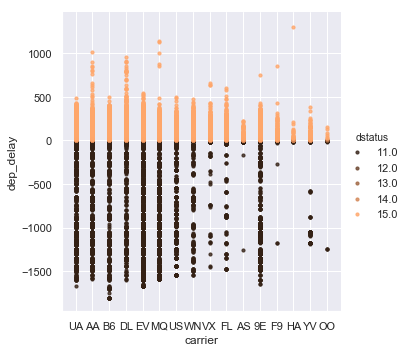

In [0]:
## palette: Colormap Possible values: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.lmplot('carrier', #horizontal axis
           'dep_delay',
           #data=flt_del,
           data=flt_df_0Nan,
           fit_reg=False,
           hue="dstatus",
           palette="copper",
           scatter_kws={"marker":"X",
                        "s":10})

print('Density of carriers delayed <0 min(1); 0 to 5min (2); 5 to 20 min (3); more than 20min (4)')

# 13. Number of Flights  from origin
# 14. Number of carrierwise from Origin

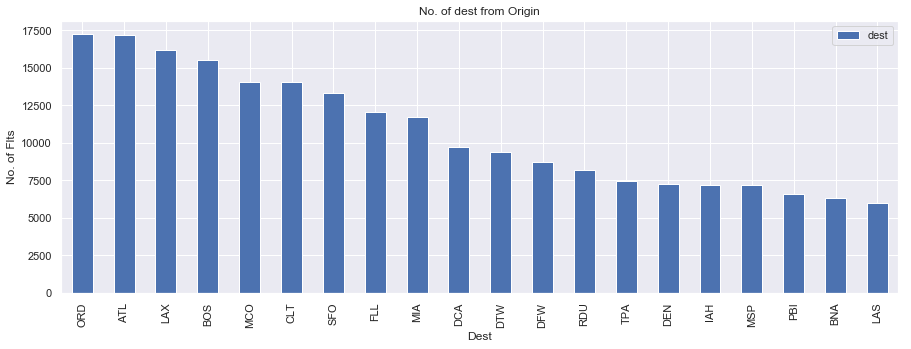

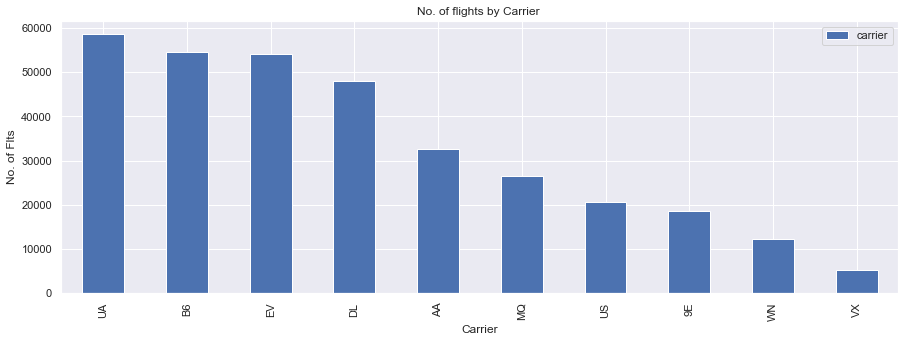

In [0]:
#barplot, ilneplot
flt_df_0Nan.dest.value_counts().nlargest(20).plot(kind='bar',figsize=(15,5), legend=1)
plt.title('No. of dest from Origin')
plt.ylabel('No. of Flts')
plt.xlabel('Dest')
plt.show()

flt_df_0Nan.carrier.value_counts().nlargest(10).plot(kind='bar',figsize=(15,5), legend=1)
plt.title('No. of flights by Carrier ')
plt.ylabel('No. of Flts')
plt.xlabel('Carrier')
plt.show()

# Ontime Departure % Originwise

#for reference - code implemented above
key_list = []
for k in onSched_Depart.index:
    key_list.append(str(k))
    
val = onSched_Depart.count()
ind = np.arange(val)  # the x locations for the groups
width = 0.15      # the width of the bars
fig, ax = plt.subplots(figsize=(14,8))
rects2 = ax.bar(ind+width,onSched_Depart*100, width, color='c')

ax.set_xticks(ind + width )
ax.set_ylabel('Dep %')
ax.set_title('OnTime Dep Flights % Origin')

ax.set_xticklabels(key_list)
#x.legend(rects2,'Arrival Delay')

def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%0.2f' % height,
                ha='center', va='bottom')
autolabel(rects2)
plt.show()

#plot of month vs delay status count of status
flt_del[['month','arr_delay']].groupby(['month']).count().plot()
plt.show()

#plot of dest vs delay status count 
flt_del[['dest','status']].groupby(['dest']).count().plot()
plt.show()  

arr_ot_df = flt_df_0Nan[(flt_df_0Nan['arr_delay']==0)] #& (flt_df_0Nan.dest.value_counts() >= 40)]

arr_ot_df.dest.value_counts().nlargest(30).plot(kind='bar',figsize=(15,5), legend=1)
plt.title('flight count at Dest')
plt.ylabel('No. of ontime Flts')
plt.xlabel('Dest')
plt.show()